## Exploring data using Pandas

![Pandas](pandas.jpg)

So far we explored Python and a few native libraries. Now we will play a little to simplify our life with tools to conduct some **data analysis**.

**Pandas** is the most popular library (so far) to import and handle data in Python.

### Let's import some data from a CSV file

**When downloading my ipynb, remember to also get the `commits_pr.csv` file**

In [259]:
import pandas
cpr = pandas.read_csv("commits_pr.csv")

It became this easy to read a CSV file!!!
And more... Look at what my `cpr` is:

In [260]:
type(cpr)

pandas.core.frame.DataFrame

Yes! A DataFrame. And it reads really nice, look:

In [261]:
cpr.head(15)
### We can use head() and tail() functions to see a bit less

,user,project_name,prog_lang,pull_req_number,num_commits
0,user1,php-src,C,122,1
1,user2,activeadmin,ruby,3325,1
2,user3,YouCompleteMe,python,2128,2
3,user4,requests,python,2663,1
4,user5,ipython,python,7901,1
5,user6,haste-compiler,haskell,407,1
6,user7,select2,javascript,1987,1
7,user8,django,python,8608,3
8,user9,folly,C++,206,1
9,user10,django,python,4745,2


Before moving forward... Explaining a little about this dataset.

This dataset represents a series of Pull Requests made to a subset of projects hosted by GitHub. We worked on this data to capture a specific type of contributor, which we called *casual contributor*. These contributors are known by having a single pull request accepted in a project and not coming back (i.e., they have no long-term commitment to the project).

In this specific dataset, you will find the following columns:

* `user`: represent a user on GitHub (anonymized here)
* `project_name`: the name of GitHub project in which the pull request was accepted
* `prog_lang`: programming language of the project
* `pull_req_num`: unique identifier of the pull request
* `num_commits`: number of commits sent within that specific pull request



### Some information about the dataframe

Dimensions/shape of the dataset (lines vs. columns)

In [262]:
cpr.shape

(42092, 5)

What about the column names?

In [263]:
cpr.columns

Index(['user', 'project_name', 'prog_lang', 'pull_req_number', 'num_commits'], dtype='object')

And the datatype per column?

In [264]:
cpr.dtypes

user               object
project_name       object
prog_lang          object
pull_req_number     int64
num_commits         int64
dtype: object

Some more information: `info()` method prints information including the index dtype and column dtypes, non-null values and memory usage.

In [265]:
cpr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42092 entries, 0 to 42091
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user             42092 non-null  object
 1   project_name     42092 non-null  object
 2   prog_lang        42092 non-null  object
 3   pull_req_number  42092 non-null  int64 
 4   num_commits      42092 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.6+ MB


What is the type of a specific column???

In [266]:
type(cpr["num_commits"])

pandas.core.series.Series

A *serie* is a list, with one dimension, indexed. Each column of a dataframe is a series

Before moving ahead, we can use the types to filter some columns. 

Let's say we want only the columns that store `int`:

In [155]:
int_columns = cpr.dtypes[cpr.dtypes == "int64"].index
int_columns

Index(['pull_req_number', 'num_commits'], dtype='object')

Now... I just want to see these columns... **BOOM**

In [156]:
cpr[int_columns].head()

,pull_req_number,num_commits
0,122,1
1,3325,1
2,2128,2
3,2663,1
4,7901,1


### What about statistical information about my DataFrame?

`describe()` method provides a summary of numeric values in your dataset: mean, standard deviation, minimum, maximum, 1st quartile, 2nd quartile (median), 3rd quartile of the columns with numeric values. It also counts the number of variables in the dataset (are there missing variables?)

In [157]:
cpr.describe()

,pull_req_number,num_commits
count,42092.000000,42092.000000
mean,4452.145681,3.824242
std,6152.304478,20.760123
min,1.000000,1.000000
25%,628.000000,1.000000
50%,2007.000000,1.000000
75%,5534.250000,2.000000
max,38174.000000,385.000000


We can do it for a Series...

In [158]:
#cpr["num_commits"].describe()
cpr.num_commits.describe()

count    42092.000000
mean         3.824242
std         20.760123
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        385.000000
Name: num_commits, dtype: float64

In [159]:
#LOOK at this with a non-numeric column
cpr.prog_lang.describe() #either way work.

count     42092
unique       17
top        ruby
freq       8147
Name: prog_lang, dtype: object

And we can get specific information per column

In [160]:
cpr.num_commits.median()

1.0

In [161]:
cpr.num_commits.mean()

3.8242421362729258

In [162]:
cpr.num_commits.std()

20.76012335707578

### --------------####
### Playing with the data: sorting

We can sort our data easily using pandas.

In this example, sorting by Programming Language

In [163]:
cpr.sort_values("pull_req_number", ascending=False, inplace=True)

We can sort using *many columns*, by using a list (sort will happen from the first item to the last)

In [164]:
cpr.head(10)

,user,project_name,prog_lang,pull_req_number,num_commits
29147,user25542,homebrew-cask,ruby,38174,1
40843,user35812,homebrew-cask,ruby,38168,1
21764,user19011,homebrew-cask,ruby,38167,2
30069,user26309,homebrew-cask,ruby,38144,1
37715,user33014,homebrew-cask,ruby,38136,1
35947,user31454,homebrew-cask,ruby,38135,1
9231,user8106,homebrew-cask,ruby,38128,1
34552,user30231,homebrew-cask,ruby,38121,4
12884,user11308,homebrew-cask,ruby,38086,1
5483,user4826,homebrew-cask,ruby,38073,1


If you want to keep the sorted version, you can use the parameter `inplace`:

In [165]:
cpr.sort_values(["num_commits"], ascending=False, inplace=True)

In [166]:
cpr.head(10)
#cpr = pandas.read_csv("commits_pr.csv") #--> to return to the original order

,user,project_name,prog_lang,pull_req_number,num_commits
38987,user34165,three.js,javascript,7832,385
705,user640,cocos2d-x,C++,6866,364
7335,user6426,redis,C,3506,315
19587,user17126,jenkins,java,2718,307
35826,user31347,redis,C,3230,290
13300,user11672,cocos2d-x,C++,16576,281
3601,user3214,three.js,javascript,7808,277
13873,user12167,spring-framework,java,642,273
26360,user23077,Faker,php,660,259
18632,user16293,libgdx,java,814,258


### Counting the occurences of variables

So, to count the occurrences in a column we have to select the column first, and use the method `value_counts()`

In [167]:
cpr.prog_lang.value_counts()

ruby            8147
javascript      7052
python          4092
php             4069
C++             2785
java            2596
C               2196
go              2103
coffeescript    2066
scala           1823
objective-c     1801
haskell          950
clojure          882
perl             663
erlang           500
typescript       343
Perl              24
Name: prog_lang, dtype: int64

But... I just want to know what are the languages out there. Is there a way?

*Always*

In [168]:
cpr["prog_lang"].unique()

array(['javascript', 'C++', 'C', 'java', 'php', 'objective-c', 'python',
       'ruby', 'typescript', 'go', 'coffeescript', 'scala', 'erlang',
       'perl', 'clojure', 'haskell', 'Perl'], dtype=object)

## OK! Let's do something else... Like, selecting columns and filtering data

Let's say that I just want to look at the columns programming language, project name and number of commits. 

I can select them and create a new DF

In [169]:
selected_columns = ["prog_lang", "project_name", "num_commits"]
type(selected_columns)

list

In [170]:
selected_columns = ["prog_lang", "project_name", "num_commits"]
my_subset = cpr[selected_columns]
my_subset.head(10)

,prog_lang,project_name,num_commits
38987,javascript,three.js,385
705,C++,cocos2d-x,364
7335,C,redis,315
19587,java,jenkins,307
35826,C,redis,290
13300,C++,cocos2d-x,281
3601,javascript,three.js,277
13873,java,spring-framework,273
26360,php,Faker,259
18632,java,libgdx,258


What if now I want to filter those projects written in `C` language?

In [171]:
only_C = cpr[(cpr["prog_lang"]=='C') & (cpr["num_commits"]==1)]
only_C.describe()

,pull_req_number,num_commits
count,1305.000000,1305.0
mean,2852.606897,1.0
std,2889.262660,0.0
min,1.000000,1.0
25%,544.000000,1.0
50%,1872.000000,1.0
75%,4205.000000,1.0
max,12987.000000,1.0


We can filter whatever we want:

In [172]:
single_commit = cpr[cpr["num_commits"] == 1]
single_commit.describe()

,pull_req_number,num_commits
count,29655.000000,29655.0
mean,4183.982769,1.0
std,6036.266784,0.0
min,1.000000,1.0
25%,566.000000,1.0
50%,1768.000000,1.0
75%,4969.500000,1.0
max,38174.000000,1.0


We can create filters in variables, and use whenever we want, as well

In [173]:
one_commit = cpr["num_commits"]==1
language_C = cpr["prog_lang"]=="C"
multi_commit = cpr["num_commits"]>1

In [174]:
cpr[one_commit & language_C].head(10)

,user,project_name,prog_lang,pull_req_number,num_commits
4141,user3682,the_silver_searcher,C,948,1
36595,user32015,redis,C,941,1
41821,user36684,memcached,C,69,1
18610,user16272,jq,C,944,1
2652,user2381,redis,C,69,1
34724,user30381,gumbo-parser,C,69,1
7614,user6673,scikit-learn,C,945,1
14865,user13010,the_silver_searcher,C,957,1
5910,user5193,scikit-learn,C,956,1
26546,user23246,masscan,C,66,1


And... we can use OR (|) and AND(&) to play!

In [175]:
cpr[one_commit & language_C].head(10)

,user,project_name,prog_lang,pull_req_number,num_commits
4141,user3682,the_silver_searcher,C,948,1
36595,user32015,redis,C,941,1
41821,user36684,memcached,C,69,1
18610,user16272,jq,C,944,1
2652,user2381,redis,C,69,1
34724,user30381,gumbo-parser,C,69,1
7614,user6673,scikit-learn,C,945,1
14865,user13010,the_silver_searcher,C,957,1
5910,user5193,scikit-learn,C,956,1
26546,user23246,masscan,C,66,1


#### What if we want the pull requests with more than one commit for the projects written in "C" + those with 2 commits for the projects written in "typescript"???

Let's do it!


In [176]:
two_commits = cpr["num_commits"]==2
typescript = cpr["prog_lang"]=="typescript"

cpr[(multi_commit & language_C) | (two_commits & typescript)]

cpr[((cpr["num_commits"]>1) & (cpr["prog_lang"]=="C")) | ((cpr["num_commits"]==2) & (cpr["prog_lang"]=="typescript"))]


,user,project_name,prog_lang,pull_req_number,num_commits
7335,user6426,redis,C,3506,315
35826,user31347,redis,C,3230,290
30507,user26699,redis,C,3759,253
297,user271,redis,C,3633,252
22522,user19679,php-src,C,2571,251
...,...,...,...,...,...
2396,user2153,godot,C,6557,2
36710,user32118,php-src,C,328,2
20127,user17580,scikit-learn,C,6200,2
26014,user22777,scikit-learn,C,7111,2


What if I wanted to convert number of commits into a feature by creating bands of values that we define:
* 1 commit = group 1
* 2 - 5 commits = group 2
* 6 - 20 commits = group 3
*  more than 20 = group 4

In [177]:
commits_from_2_to_5 = (cpr["num_commits"]<=5) & (cpr["num_commits"]>=2)

cpr.loc[one_commit, "group_commit"]=1
cpr.loc[commits_from_2_to_5, "group_commit"]=2


In [178]:
cpr.head(5)

,user,project_name,prog_lang,pull_req_number,num_commits,group_commit
38987,user34165,three.js,javascript,7832,385,NaN
705,user640,cocos2d-x,C++,6866,364,NaN
7335,user6426,redis,C,3506,315,NaN
19587,user17126,jenkins,java,2718,307,NaN
35826,user31347,redis,C,3230,290,NaN


### I challenge you:

What if: I wanted to know what is the average of num_commits for those pull requests in group_commit 2???

In [179]:
group_two = cpr["group_commit"]==2
group_two_dataframe = cpr[group_two]
group_two_dataframe.num_commits.mean()

2.62746814512207

### I challenge you (2):

Can you do that average per language?


In [192]:
for lang in cpr["prog_lang"].unique():
    data = cpr[cpr["prog_lang"] == lang]
    print(lang + ": \t" + str(data.num_commits.mean()))

javascript: 	4.074305161656268
C++: 	8.20754039497307
C: 	6.885245901639344
java: 	5.972265023112481
php: 	5.163430818382895
objective-c: 	3.425319267073848
python: 	2.5386119257087
ruby: 	2.2452436479685773
typescript: 	4.766763848396502
go: 	2.2030432715168806
coffeescript: 	2.304937076476283
scala: 	2.571036752605595
erlang: 	2.708
perl: 	2.6561085972850678
clojure: 	1.9682539682539681
haskell: 	2.4063157894736844
Perl: 	1.7916666666666667


In [267]:
cpr.groupby(["prog_lang"]).describe()

pull_req_number                                                  \
                       count         mean          std  min      25%     50%   
prog_lang                                                                      
C                     2196.0  3340.718124  3113.785559  1.0   704.75  2427.0   
C++                   2785.0  5393.853142  5216.342089  1.0   954.00  3439.0   
Perl                    24.0    66.625000    56.155694  1.0    10.75    62.5   
clojure                882.0   601.233560   659.704443  1.0   110.50   297.0   
coffeescript          2066.0  1155.201355  1092.298069  2.0   341.00   808.0   
erlang                 500.0   369.026000   375.595054  1.0    92.50   248.0   
go                    2103.0  2189.967665  1994.589005  1.0   566.50  1530.0   
haskell                950.0  1027.640000  1073.496504  1.0   284.00   553.5   
java                  2596.0  4886.220724  6770.891969  1.0   563.50  1603.0   
javascript            7052.0  4635.527935  3896.028860  1.0  1500.75  3315.0   
objective-c           1801.0   958.897835   946.184484  1.0   241.00   571.0   
perl                   663.0   406.612368   313.133880  2.0   134.50   334.0   
php                   4069.0  3331.454411  3263.961858  1.0   680.00  2377.0   
python                4092.0  3026.508309  3073.273573  1.0   719.75  1745.0   
ruby                  8147.0  9085.637658  9873.403196  1.0  1390.00  4363.0   
scala                 1823.0  4129.870543  6471.173247  1.0   457.50  1367.0   
typescript             343.0  4362.323615  5465.178557  1.0   135.50  1257.0   

                                num_commits                                 \
                   75%      max       count      mean        std  min  25%   
prog_lang                                                                    
C              5143.50  13040.0      2196.0  6.885246  31.142637  1.0  1.0   
C++            9090.00  20150.0      2785.0  8.207540  36.843965  1.0  1.0   
Perl            118.75    163.0        24.0  1.791667   2.358687  1.0  1.0   
clojure         941.75   2324.0       882.0  1.968254   8.607807  1.0  1.0   
coffeescript   1580.75   4625.0      2066.0  2.304937  10.824595  1.0  1.0   
erlang          540.50   1959.0       500.0  2.708000  13.874427  1.0  1.0   
go             3448.00   8674.0      2103.0  2.203043   8.442572  1.0  1.0   
haskell        1410.50   4009.0       950.0  2.406316  10.041597  1.0  1.0   
java           5576.75  26501.0      2596.0  5.972265  31.208985  1.0  1.0   
javascript     7329.25  16129.0      7052.0  4.074305  21.794352  1.0  1.0   
objective-c    1502.00   3975.0      1801.0  3.425319  19.272465  1.0  1.0   
perl            647.00   1166.0       663.0  2.656109  13.405572  1.0  1.0   
php            4930.00  14762.0      4069.0  5.163431  24.771018  1.0  1.0   
python         4601.00  13940.0      4092.0  2.538612  12.839750  1.0  1.0   
ruby          15018.50  38174.0      8147.0  2.245244  12.142810  1.0  1.0   
scala          3692.50  23589.0      1823.0  2.571037  10.647855  1.0  1.0   
typescript     8213.50  18077.0       343.0  4.766764  24.168835  1.0  1.0   

                               
              50%  75%    max  
prog_lang                      
C             1.0  2.0  315.0  
C++           1.0  2.0  364.0  
Perl          1.0  1.0   12.0  
clojure       1.0  1.0  178.0  
coffeescript  1.0  2.0  250.0  
erlang        1.0  2.0  250.0  
go            1.0  2.0  250.0  
haskell       1.0  2.0  172.0  
java          1.0  2.0  307.0  
javascript    1.0  2.0  385.0  
objective-c   1.0  2.0  256.0  
perl          1.0  2.0  250.0  
php           1.0  2.0  259.0  
python        1.0  2.0  251.0  
ruby          1.0  2.0  250.0  
scala         1.0  2.0  250.0  
typescript    1.0  2.0  250.0

In [258]:
cpr.groupby(["user"]).describe()

KeyboardInterrupt: 














### Some more... 

Let's work with a new dataset... 

This is not only related to casual contributors, but all contributors

In [197]:
commits_complete = pandas.read_csv('commit_complete.csv')
commits_complete.sort_values('num_commits', ascending=False).head(20)

,user,project_name,prog_lang,num_commits,additions,deletions,files_changed,num_comments
52041,user_13168,cocos2d-x,C++,10000.0,1320472.0,24870.0,5865.0,0.0
52036,user_13168,cocos2d-x,C++,10000.0,1321513.0,24870.0,5905.0,0.0
54883,user_13227,cocos2d-x,C++,10000.0,1549480.0,843841.0,9726.0,0.0
52033,user_13168,cocos2d-x,C++,10000.0,1320976.0,24870.0,5892.0,0.0
61760,user_13751,cocos2d-x,C++,10000.0,1163795.0,24870.0,5241.0,0.0
52034,user_13168,cocos2d-x,C++,10000.0,1321296.0,24870.0,5905.0,0.0
61813,user_13757,cocos2d-x,C++,10000.0,1324952.0,24870.0,5903.0,0.0
52035,user_13168,cocos2d-x,C++,10000.0,1321419.0,24870.0,5890.0,0.0
61841,user_13764,cocos2d-x,C++,10000.0,1539898.0,21568.0,6574.0,0.0
54495,user_13188,cocos2d-x,C++,10000.0,1249461.0,1129333.0,8848.0,0.0


In [200]:
commits_complete['deletions'].corr(commits_complete['additions'])

0.2448588093221469

In [201]:
commits_complete.corr()

,num_commits,additions,deletions,files_changed,num_comments
num_commits,1.000000,0.657321,0.151074,0.605152,-0.007297
additions,0.657321,1.000000,0.244859,0.749543,-0.002682
deletions,0.151074,0.244859,1.000000,0.566905,0.011876
files_changed,0.605152,0.749543,0.566905,1.000000,0.003657
num_comments,-0.007297,-0.002682,0.011876,0.003657,1.000000


In [202]:
commits_complete.corr(method='pearson').style.background_gradient(cmap='coolwarm')

,num_commits,additions,deletions,files_changed,num_comments
num_commits,1.000000,0.657321,0.151074,0.605152,-0.007297
additions,0.657321,1.000000,0.244859,0.749543,-0.002682
deletions,0.151074,0.244859,1.000000,0.566905,0.011876
files_changed,0.605152,0.749543,0.566905,1.000000,0.003657
num_comments,-0.007297,-0.002682,0.011876,0.003657,1.000000


### Can we play with graphics?

**Plot types:**
- 'line' : line plot (default)
- 'bar' : vertical bar plot
- 'barh' : horizontal bar plot
- 'hist' : histogram
- 'box' : boxplot
- 'kde' : Kernel Density Estimation plot
- 'density' : same as 'kde'
- 'area' : area plot
- 'pie' : pie plot
- 'scatter' : scatter plot
- 'hexbin' : hexbin plot

**Histogram**

In [215]:
cpr[multi_commit]

,user,project_name,prog_lang,pull_req_number,num_commits,group_commit
38987,user34165,three.js,javascript,7832,385,NaN
705,user640,cocos2d-x,C++,6866,364,NaN
7335,user6426,redis,C,3506,315,NaN
19587,user17126,jenkins,java,2718,307,NaN
35826,user31347,redis,C,3230,290,NaN
...,...,...,...,...,...,...
4243,user3774,django,python,6768,2,2.0
37295,user32646,scalatra,scala,329,2,2.0
40657,user35646,react,javascript,6746,2,2.0
28583,user25031,scikit-learn,C,6758,2,2.0


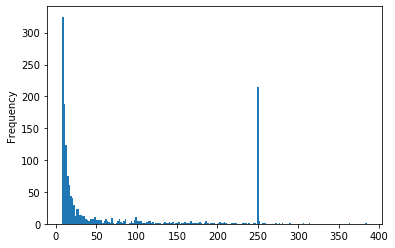

In [218]:
cpr[cpr["num_commits"]>7].num_commits.plot.hist(bins=200)

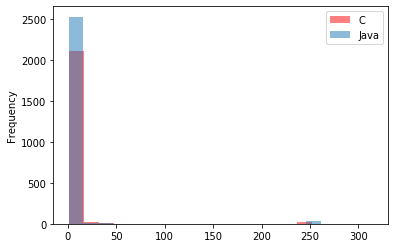

In [221]:
cpr[cpr["prog_lang"]=="C"].num_commits.plot.hist(bins=20, color="red", alpha=0.5)
cpr[cpr["prog_lang"]=="java"].num_commits.plot.hist(bins=20, alpha=0.5).legend(["C", "Java"])

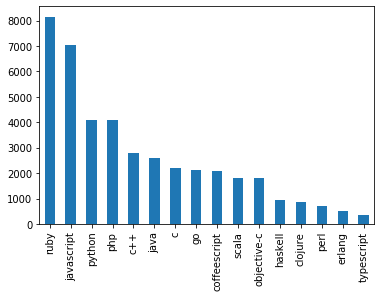

In [231]:
cpr.prog_lang.str.lower().value_counts().plot.bar()

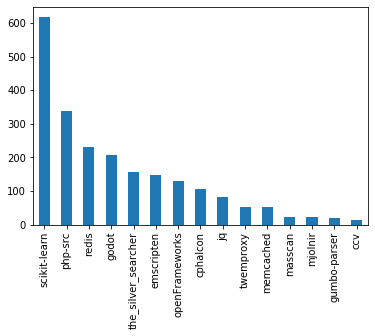

In [234]:
cpr[cpr["prog_lang"]== "C"].project_name.value_counts().plot.bar()

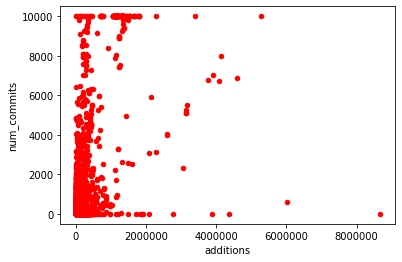

In [237]:
commits_complete.plot.scatter(x = "additions", y = "num_commits", color="red")

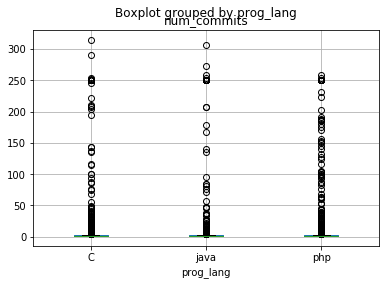

In [238]:
lang_c = cpr.prog_lang=="C"
lang_java = cpr.prog_lang=="java"
lang_php = cpr.prog_lang=="php"


cpr[(lang_c) | (lang_java) | (lang_php)].boxplot(by='prog_lang', column=['num_commits'])


Text(0.5, 1.0, '')

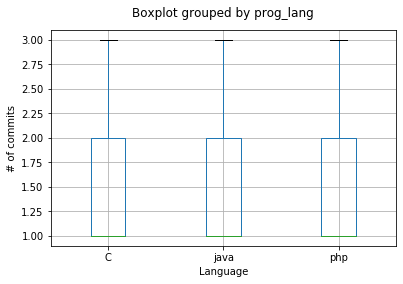

In [240]:

plot = cpr[(lang_c) | (lang_java) | (lang_php)].boxplot(by='prog_lang', column=['num_commits'], showfliers=False, grid=True)

plot.set_xlabel("Language")
plot.set_ylabel("# of commits")
plot.set_title("")

**Just to show...**

that it is possible to do statistical analysis

In [241]:
from scipy import stats

stats.mannwhitneyu(cpr[(lang_c)].num_commits, cpr[(lang_java)].num_commits)


MannwhitneyuResult(statistic=2481768.0, pvalue=2.1763470665307134e-20)

### Exporting

In [244]:
my_subset.to_dict()

{'prog_lang': {38987: 'javascript',
  705: 'C++',
  7335: 'C',
  19587: 'java',
  35826: 'C',
  13300: 'C++',
  3601: 'javascript',
  13873: 'java',
  26360: 'php',
  18632: 'java',
  11805: 'objective-c',
  30507: 'C',
  29618: 'php',
  31455: 'java',
  297: 'C',
  34902: 'python',
  4035: 'javascript',
  22522: 'C',
  17330: 'javascript',
  15688: 'java',
  4876: 'C',
  39577: 'php',
  11332: 'python',
  40015: 'java',
  4059: 'php',
  31301: 'C++',
  37120: 'ruby',
  41066: 'objective-c',
  14922: 'javascript',
  27210: 'C++',
  5053: 'javascript',
  12142: 'typescript',
  12477: 'ruby',
  32510: 'javascript',
  1142: 'python',
  6891: 'objective-c',
  2762: 'C++',
  5620: 'javascript',
  14943: 'java',
  40423: 'javascript',
  9063: 'C++',
  20683: 'javascript',
  12604: 'java',
  2405: 'C',
  28796: 'objective-c',
  15686: 'javascript',
  22431: 'C',
  14461: 'python',
  14910: 'javascript',
  41780: 'javascript',
  16113: 'C++',
  10328: 'php',
  30588: 'C',
  9786: 'C++',
  4649

In [245]:
cpr.to_csv('test.csv', sep=',')

## Go for the HW